### **1. Importing Liabraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

### **2. Loading Datasets**


In [2]:
data=pd.read_csv("../data/clean_data.csv",index_col=0,parse_dates=['trans_date_trans_time','dob'])
data.head(10)
print("Dataset has " , data.shape[0] , " rows and ",data.shape[1] , " columns")
print('column names: \n') 
print('\n'.join(list(data.columns)))

Dataset has  1852394  rows and  29  columns
column names: 

trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud
label
age
trans_year
trans_month
trans_days
trans_week_days
trans_hour


### **3. Deleting Unnecessary Columns**

In [143]:
# list of the columns to be dropped

drop_cols = ['trans_date_trans_time','street','merchant','zip','first','last','trans_num','job','dob','city','trans_days','trans_year']

In [144]:
data.drop(drop_cols, axis = 1, inplace = True)
data.reset_index(drop=True, inplace = True)
list(data.columns) # lets look at the remaining list of columns


['cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'label',
 'age',
 'trans_month',
 'trans_week_days',
 'trans_hour']

In [145]:
data.head()

,cc_num,category,amt,gender,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,label,age,trans_month,trans_week_days,trans_hour
0,2703186189652095,misc_net,4.97,F,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,Train,30.0,1,Tuesday,0
1,630423337322,grocery_pos,107.23,F,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,Train,40.0,1,Tuesday,0
2,38859492057661,entertainment,220.11,M,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,Train,56.0,1,Tuesday,0
3,3534093764340240,gas_transport,45.00,M,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,Train,51.0,1,Tuesday,0
4,375534208663984,misc_pos,41.96,M,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,Train,32.0,1,Tuesday,0


### **4. Removing Outliers**

In [146]:
numeric_col=data.select_dtypes(include=[np.number])
numeric_col.columns

Index(['cc_num', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'trans_month', 'trans_hour'],
      dtype='object')

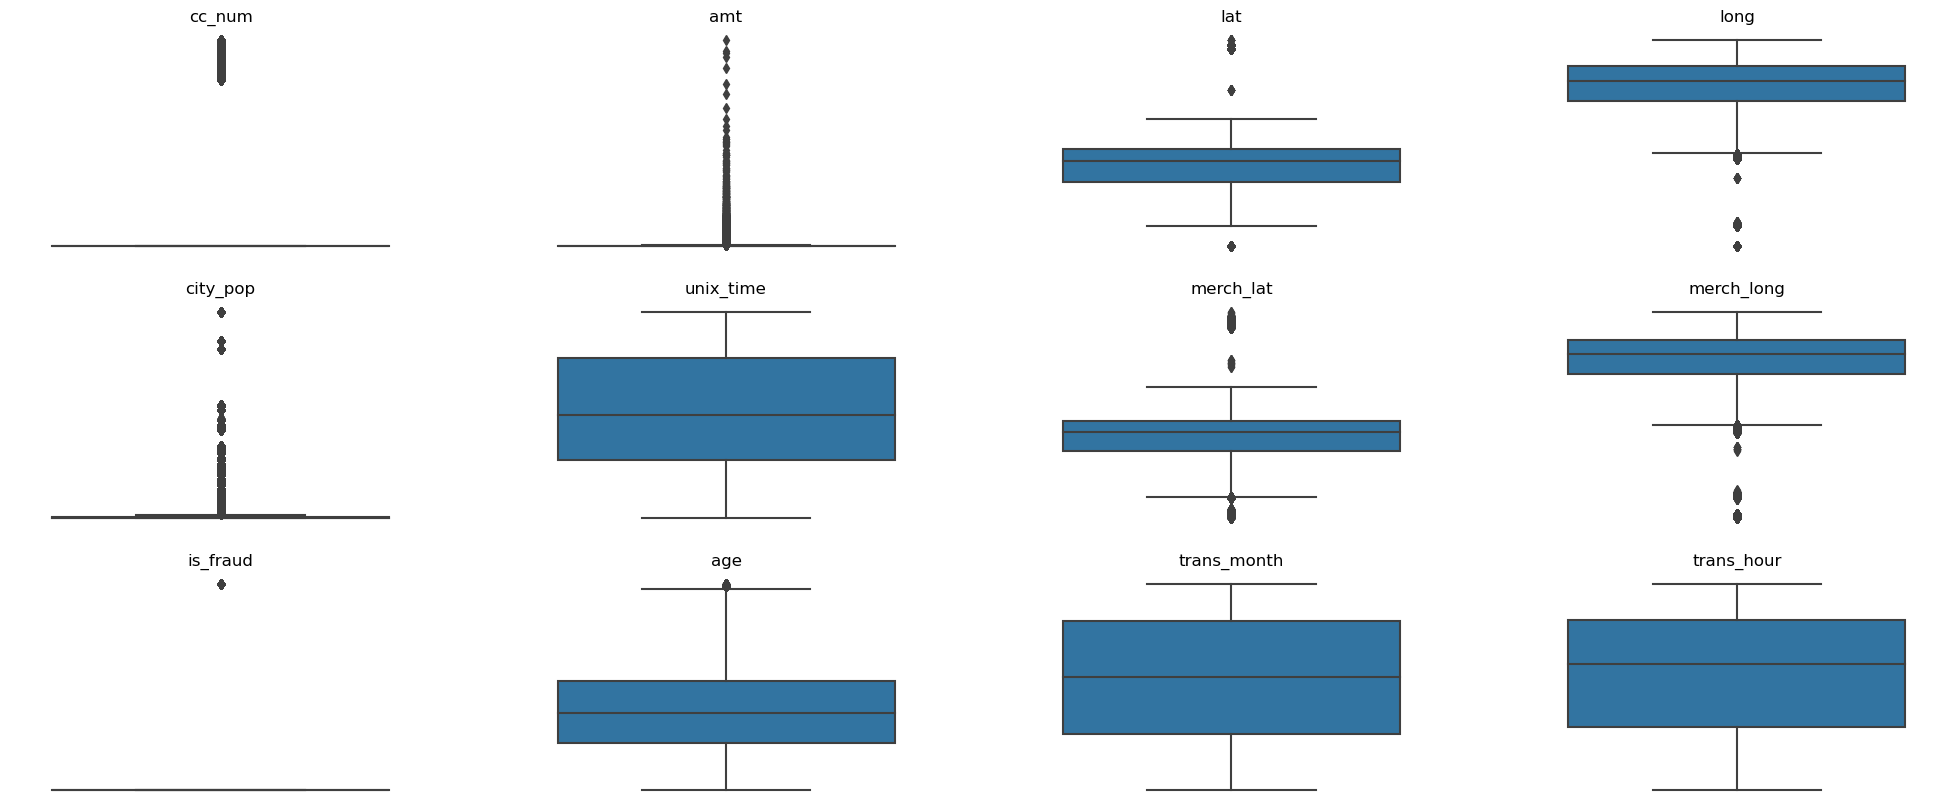

In [147]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(numeric_col):
  plot_var = data[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 

In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values. 

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 

How RobustScaler works: 

class 

sklearn.preprocessing.RobustScaler( 

with_centering=True, 

with_scaling=True, 

quantile_range=(25.0, 75.0), 

copy=True, 

) 

It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 

The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. 

RobustScaler uses the interquartile range so that it is robust to outliers. Therefore its formula is as follows: 

\dfrac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}    

In [148]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(data.select_dtypes(include=[np.number]))
robust_df = pd.DataFrame(robust_df,columns=numeric_col.columns) 

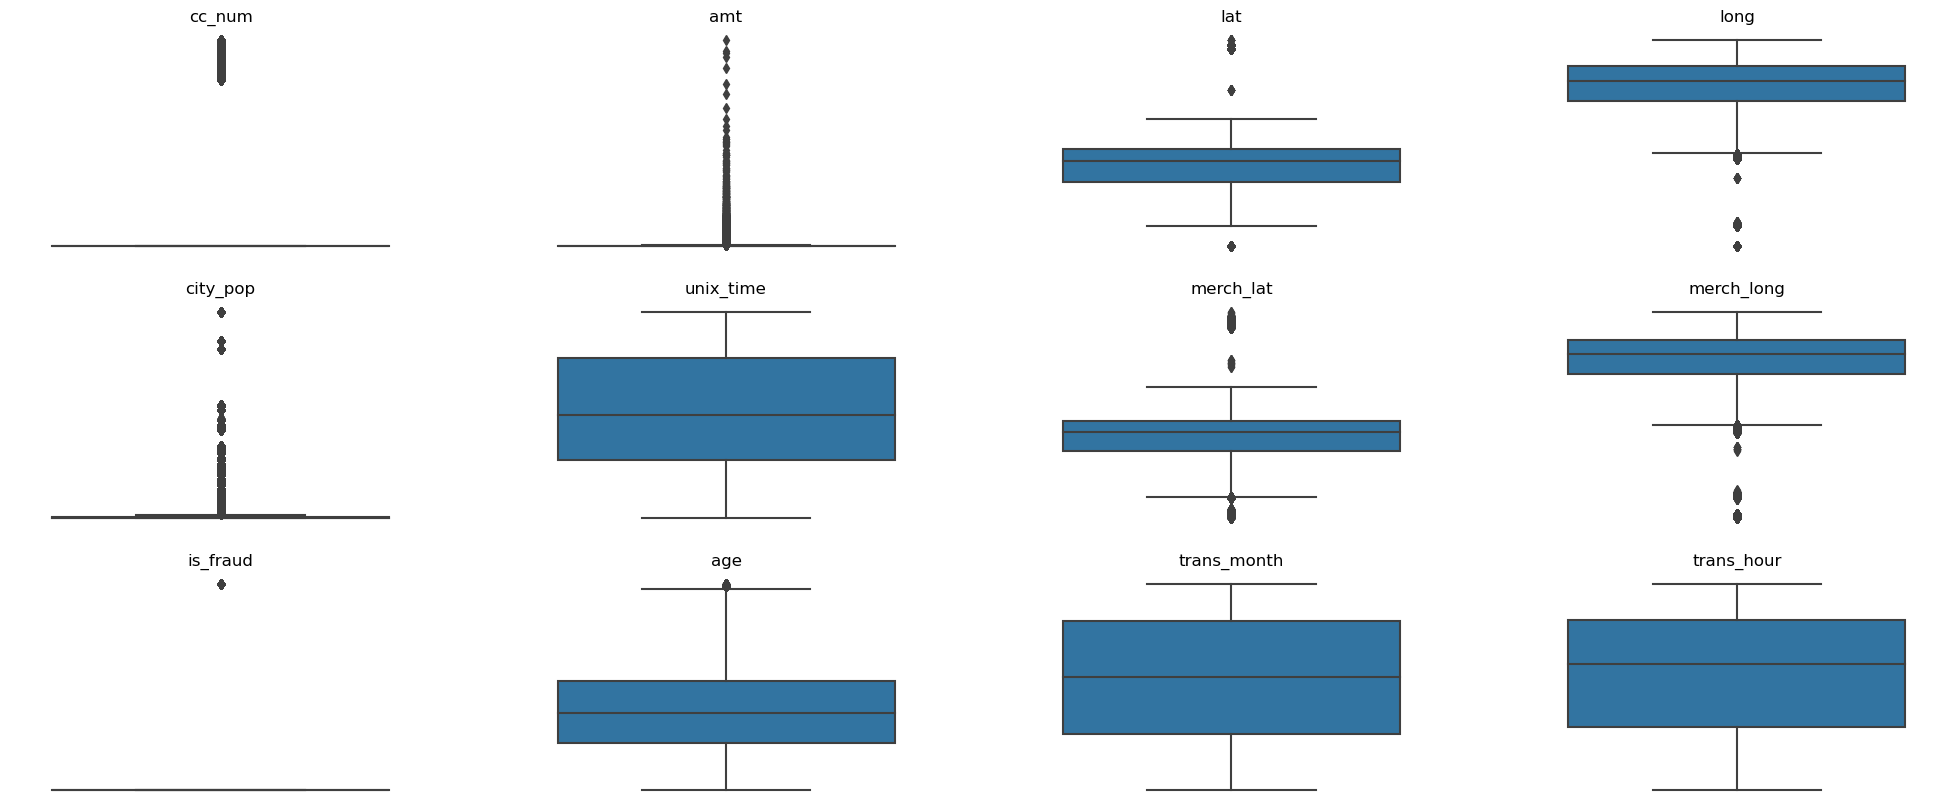

In [149]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(robust_df):
  plot_var = robust_df[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

In [150]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(robust_df)
standard_df = pd.DataFrame(standard_df,columns=robust_df.columns)
type(standard_df)

pandas.core.frame.DataFrame

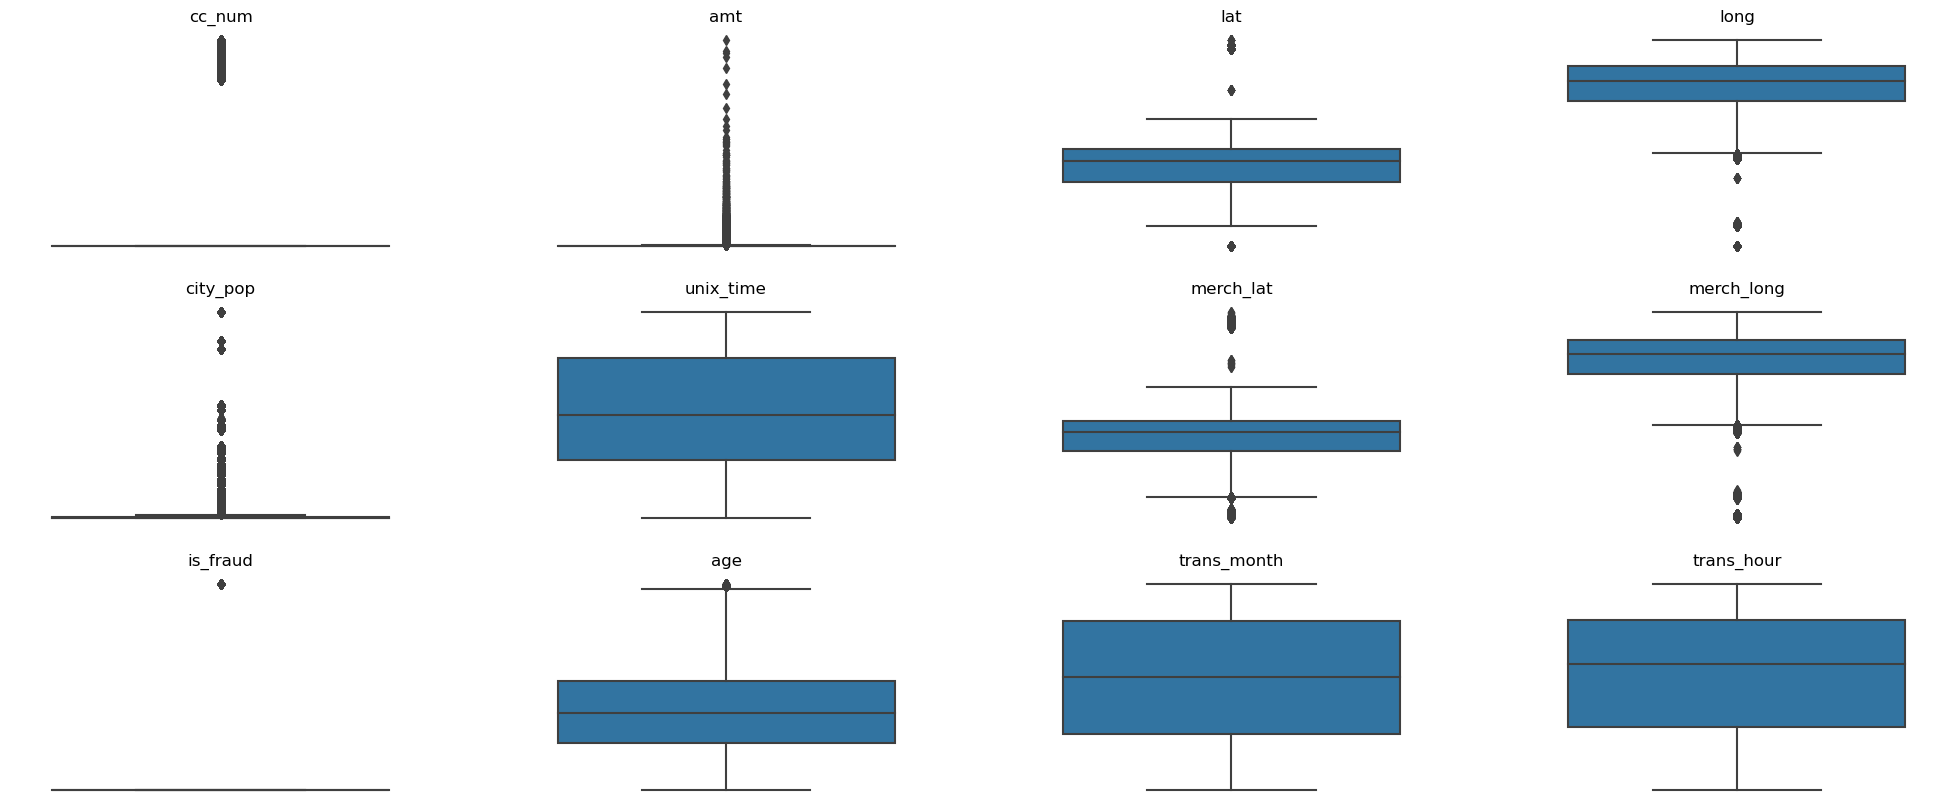

In [151]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(standard_df):
  plot_var = standard_df[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

### **5. Split the Train - Test Dataset**

In [152]:
train_data = data[data['label'] == 'Train'] # splitting data in Train dataset

test_data = data[data['label'] == 'Test'] # test in label


In [153]:
train_data.drop('label', axis =1, inplace = True) # dropping the label column in Train dataset

test_data.drop('label', axis =1, inplace = True) # dropping the label column in Test dataset

### **6. Creating Dummy Variables**

In [154]:
#convert category to dummy variables in both Train and Test datasets

train_data=pd.get_dummies(train_data, drop_first=True)
test_data=pd.get_dummies(test_data, drop_first=True)

### **7. Saving Data**

In [157]:
# save the data to a new csv file
data.to_csv("../data/train_data.csv")
data.to_csv("../data/test_data.csv")

In [158]:
test_data

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,...,state_WA,state_WI,state_WV,state_WY,trans_week_days_Monday,trans_week_days_Saturday,trans_week_days_Sunday,trans_week_days_Thursday,trans_week_days_Tuesday,trans_week_days_Wednesday
1296675,2291163933867244,2.86,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,52.0,...,0,0,0,0,0,0,1,0,0,0
1296676,3573030041201292,29.84,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,30.0,...,0,0,0,0,0,0,1,0,0,0
1296677,3598215285024754,41.28,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,49.0,...,0,0,0,0,0,0,1,0,0,0
1296678,3591919803438423,60.05,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,32.0,...,0,0,0,0,0,0,1,0,0,0
1296679,3526826139003047,3.19,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,64.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,54.0,...,0,0,0,0,0,0,0,1,0,0
1852390,3556613125071656,111.84,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,21.0,...,0,0,0,0,0,0,0,1,0,0
1852391,6011724471098086,86.88,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,39.0,...,1,0,0,0,0,0,0,1,0,0
1852392,4079773899158,7.99,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,55.0,...,0,0,0,0,0,0,0,1,0,0
